<a href="https://colab.research.google.com/github/julietsvq/capstone/blob/main/GamingL300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install google-cloud-aiplatform
! pip install pandas
! pip install google-cloud-texttospeech
! pip install --upgrade google-cloud-texttospeech

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 3.0 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import google.cloud
import vertexai
from vertexai.preview import generative_models
from vertexai.preview.vision_models import Image, ImageGenerationModel
from google.cloud import texttospeech

In [ ]:
PROJECT_ID = "jmoreirodemos-347811"
LOCATION = "us-central1"

In [ ]:
from google.colab import auth
auth.authenticate_user(project_id=PROJECT_ID)

In [ ]:
genre = ["RPG", "FPS", "Platform", "Party", "Puzzle", "Board"]
setting = ["Cyberspace", "Ancient Rome", "Space", "A deserted island", "Futuristic city"]

if not os.path.exists("assets"):
    os.makedirs("assets")

if not os.path.exists("skyboxes"):
    os.makedirs("skyboxes")

if not os.path.exists("transcripts"):
    os.makedirs("transcripts")

if not os.path.exists("audios"):
    os.makedirs("audios")

vertexai.init(project=PROJECT_ID, location=LOCATION)

**Method definitions**

In [ ]:
def generateAsset(prompt: str, negative: str, title: str, num: int = 1, folder: str = "assets"):
    try:
        if(num < 5):
            model = ImageGenerationModel.from_pretrained("imagegeneration@005")

            images = model.generate_images(
              prompt=prompt,
              negative_prompt=negative,
              number_of_images=num,
              seed=1
            )

            for i, image in enumerate(images):
                image.save(location=f"./{folder}/{title}_{i}.png", include_generation_parameters=True)
                print(f"image {i} > ./{folder}/{title}_{i}.png")
                image.show()
        else:
            print("Please specify a value between 1 and 4 for the maximum number of image assets to generate")

    except Exception as e:
        print(e)

def assetFromSketch(prompt: str, negative: str, source: str, title: str, num: int = 1):
    try:
        if(num < 8):
            model = ImageGenerationModel.from_pretrained("imagegeneration@002")
            base_img=Image.load_from_file(location=source)

            images = model.edit_image(
              base_image=base_img,
              prompt=prompt,
              seed=1,
              negative_prompt=negative,
              guidance_scale=20,
              number_of_images=num)

            for i, image in enumerate(images):
                image.save(location=f"./assets/{title}_{i}.png", include_generation_parameters=True)
                image.show()
        else:
            print("Please specify a value between 1 and 8 for the maximum number of image assets to generate")

    except Exception as e:
        print(e)

def upscaleAsset(source: str, title: str, size: int):
    try:
        if(size == 1024 or size == 2048):
            model = ImageGenerationModel.from_pretrained("imagegeneration@002")
            base_img=Image.load_from_file(location=source)
            up_image = model.upscale_image(image=base_img, new_size=size)
            up_image.save(location=f"./assets/{title}.png", include_generation_parameters=True)
            image.show()
        else:
            print("Please specify 1024 oe 2048")

    except Exception as e:
        print(e)

def generateSkybox(prompt: str, negative: str, title: str, num: int = 1):
    skyprompt = f"A 360 panoramic equirectangular image of {prompt}"
    generateAsset(skyprompt, negative_prompt, filename, num, "skyboxes")

def generateGameIdea(genre: str, character: str, theme: str):
    try:
        model = GenerativeModel("gemini-pro")
        config = {"max_output_tokens": 2048, "temperature": 1, "top_p": 1, "top_k": 32}
        prompt = f"Generate a {genre} videogame idea where the main character is {character} and which is themed around {theme}. Express the game play specifying each of these elements in a new line: Title, Gameplay, Game Mechanics, Main character, Secondary characters, Objective"

        response = model.generate_content(prompt, generation_config=config).text
        print(f"{response} \n")

        title = response[response.find("Title")+len("Title"):response.rfind("Gameplay")].strip(" *:.")
        main_character = response[response.find("Main Character")+len("Main Character"):response.rfind("Secondary Characters")].strip(" *:.")
        secondary_characters = response[response.find("Secondary Characters")+len("Secondary Characters"):response.rfind("Objective")].strip(" *:.")
        asset = generateAsset(main_character, "", f"{title}_main_character", 2)
        asset2 = generateAsset(secondary_characters, f"{title}_sec_characters", 2)

    except Exception as e:
        print(e)

**Generate image asset:** specify prompt, file name and (optional) number of image assets to generate

image 0 > ./assets/astronaut_0.png


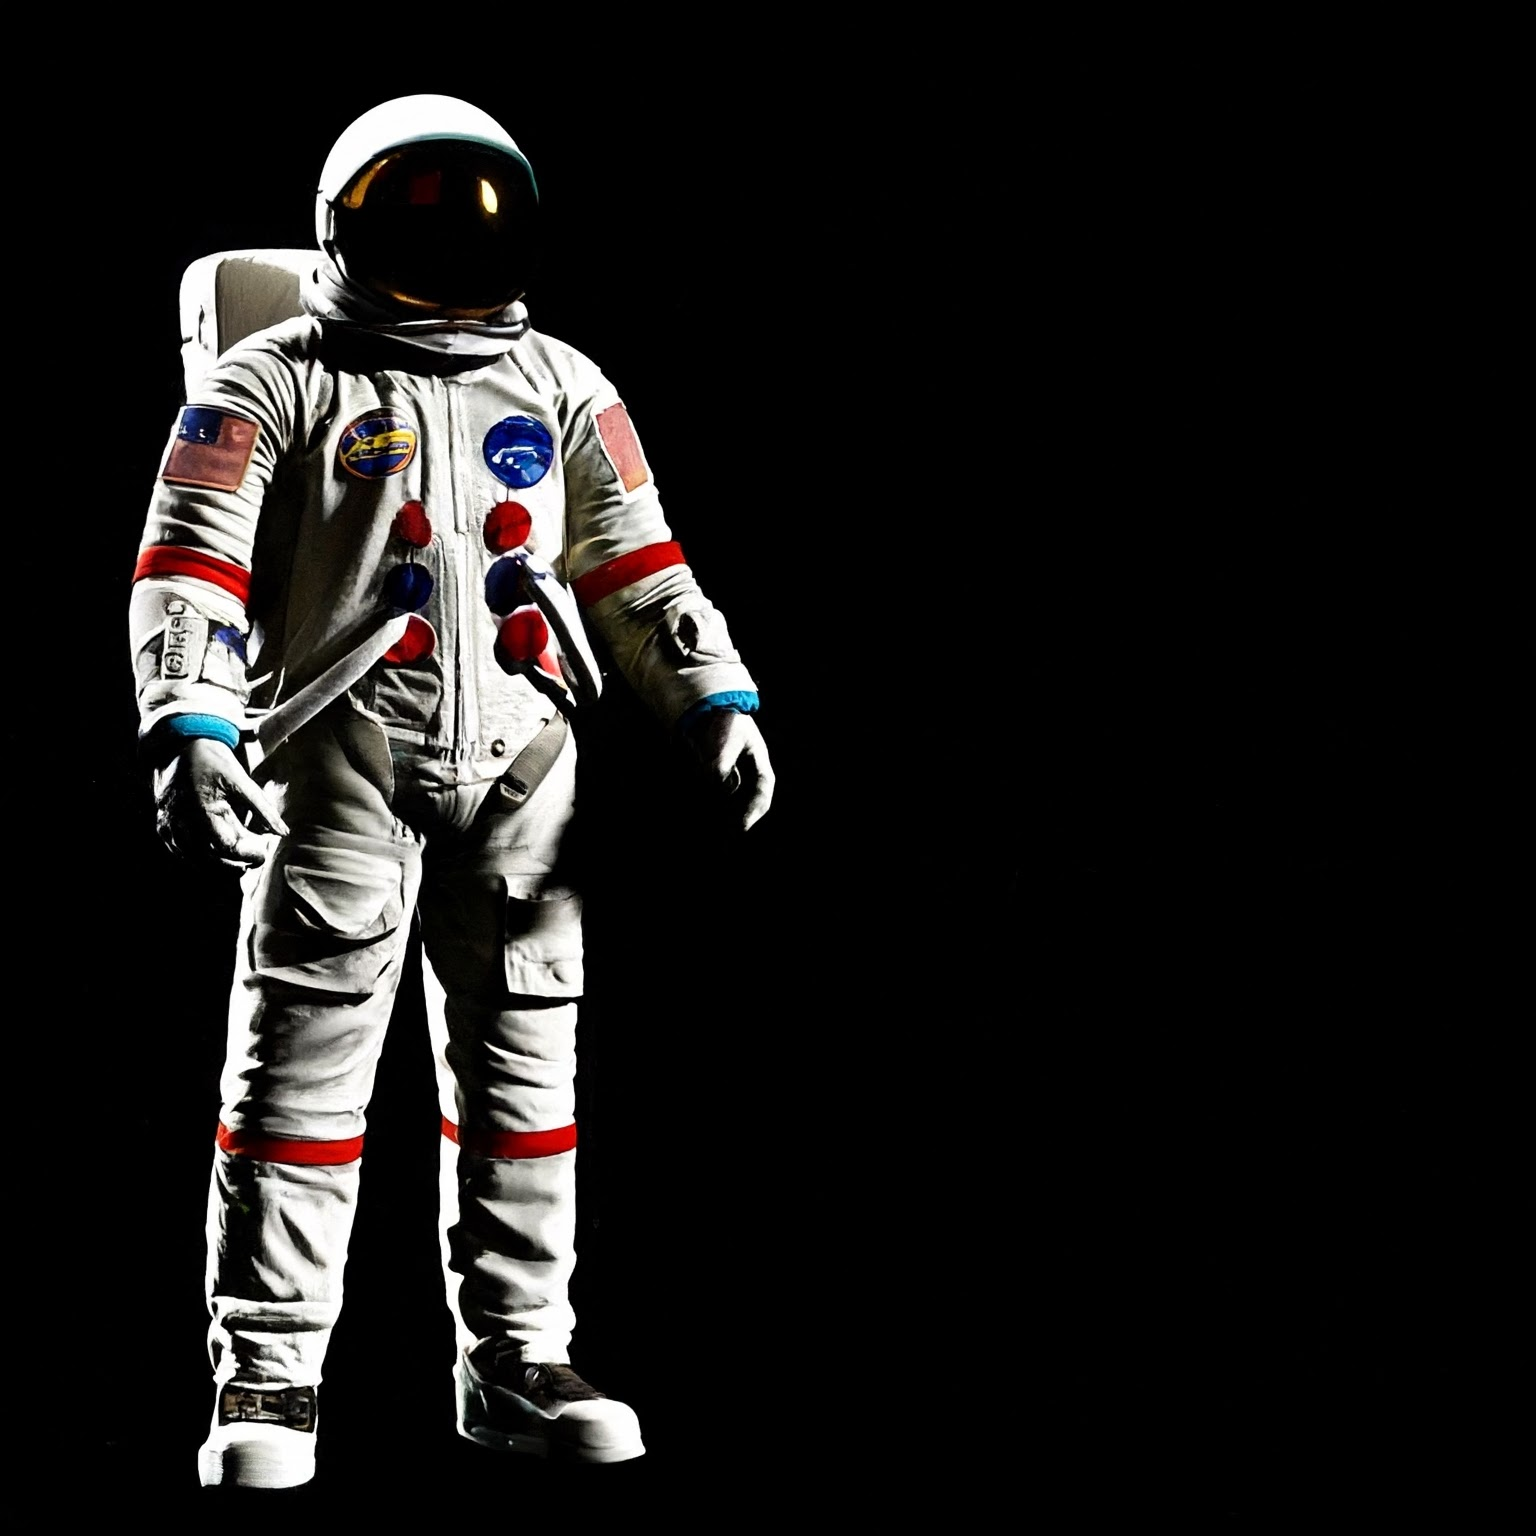

In [ ]:
prompt = "A realistic illustration of an astronaut showing the full body looking forward with a black solid background"
negative_prompt = ""
filename = "astronaut"
num = 1 #currently supported: up to 4

generateAsset(prompt, negative_prompt, filename, num)

**Generate image from sketch:** specify prompt, sketch and output file names and (optional) number of images to generate

In [ ]:
prompt = "Green dinasour"
negative_prompt = ""
source_filename = "./assets/dino.jpg"
edited_filename = "dino2"
num = 2 #currently supported: up to 8

assetFromSketch(prompt, negative_prompt, source_filename, edited_filename, num)


**Upscale image asset:** specify source and output file names and new size

In [ ]:
source_filename = "./assets/pencil_astronaut_0.png"
upscaled_filename = "upscaled_astronaut"
size = 2048 #currently supported: 2048, 4096

upscaleAsset(source_filename, upscaled_filename, size)

**Generate skybox image:** specify prompt, file name and (optional) number of image assets to generate

In [ ]:
prompt = "new york city downtown"
filename = "skybox_field"
num = 1 #currently supported: up to 4

generateSkybox(prompt, negative_prompt, filename, num)